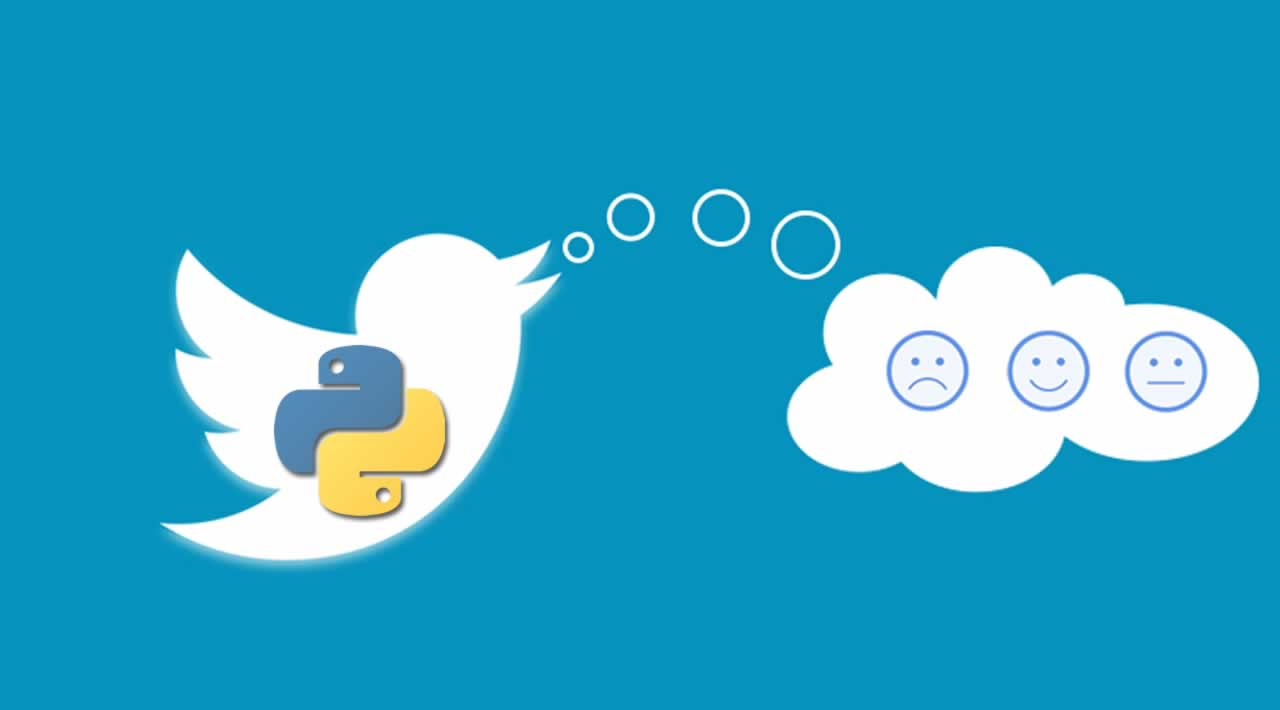

In [75]:
from IPython.display import Image
Image(filename='beef36fd707d.jpg')



### Twitter Data Sentiment Analysis
- 1) Twitter Data:- First step is to configure twitter API and gather twitter data
- 2) Clean the data
- 3) Sentiment:- To find out sentiments
- 4) Analysis:- To do analysis

In [47]:
import tweepy 
from textblob import TextBlob #sentimnts library
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [2]:
APIKey="W2XtGXNhNK9M03XcEA9LLVa17"
APISecretKey="J7wmwyKXxBfaOmn2LVtLloP28NJWcrUR6L2MQeqn8VFAjC6nQO"
accessToken="1387284148713234445-21fcTuPB6LTh6Zyi9Zxb5zxrxEIu8N"
accessTokenSecret="UK4vgiRYtjkev6c3JouvqXkv4Z0FQD3fsmbPYHPJFiItG"


In [3]:
### Authenticate
authenticate= tweepy.OAuthHandler(APIKey,APISecretKey)
authenticate.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(authenticate)

In [4]:
posts=api.user_timeline(screen_name='Trump',count=100,lang="en",tweet_mode='extended')
i=1
for tweet in posts[:10]:
    print(str(i)+')'+ tweet.full_text+'\n')
    i=i+1

1)There’s nothing quite like summer in Chicago. Experience the city’s most special season with @TrumpHotels #NeverSettleOffer, featuring 2 tickets for Wendella's architectural boat cruise, a dining credit, and a summer-themed welcome amenity. https://t.co/LI7io91g0C https://t.co/RkJZutpHU4

2)The iconic @TrumpTurnberry boasts championship golf, stunning coastline views, and the cutest pups around. #NationalTakeYourDogToWorkDay https://t.co/lv7wzjgVUW

3)Soak up summertime at Oahu's only Forbes Travel Guide Five-Star hotel, @TrumpWaikiki. Our @TrumpHotels #NeverSettleSummer offer features private surf lessons, a resort credit, a keepsake Trump Waikiki beach bag, and more. Book today: https://t.co/Ek9eUIw9cL https://t.co/RIqOTl74dZ

4)Today we celebrate the many incredible fathers throughout our Trump Organization family. Happy Father’s Day to you! https://t.co/6MEURn6i6I

5)‘Tis the season for lounging poolside. https://t.co/CWh2qKkB5C

6)Find Dad’s favorite gift on @TrumpStore’s Father

In [9]:
# Create a dataframe with a column called tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

In [10]:
df

,Tweets
0,There’s nothing quite like summer in Chicago. ...
1,The iconic @TrumpTurnberry boasts championship...
2,Soak up summertime at Oahu's only Forbes Trave...
3,Today we celebrate the many incredible fathers...
4,‘Tis the season for lounging poolside. https:/...
...,...
95,Get in the holiday spirit while skating across...
96,RT @TrumpTower: Our first snowfall of the seas...
97,Our Christmas tree at @TrumpDC is bringing a n...
98,"RT @EricTrump: Every Christmas, our office col..."


In [31]:
def cleanTxt(text):
    text=re.sub('@[a-zA-Z0-9]*','',text)
    text=re.sub("#",'',text)
    text=re.sub('RT[\s]+','',text)
    text=re.sub('https?:\/\/\S+','',text)
    return text

In [32]:
df['Tweets']=df['Tweets'].apply(cleanTxt)

In [33]:
df

,Tweets
0,There’s nothing quite like summer in Chicago. ...
1,"The iconic boasts championship golf, stunning..."
2,Soak up summertime at Oahu's only Forbes Trave...
3,Today we celebrate the many incredible fathers...
4,‘Tis the season for lounging poolside.
...,...
95,Get in the holiday spirit while skating across...
96,: Our first snowfall of the season! ❄️
97,Our Christmas tree at is bringing a new level...
98,": Every Christmas, our office collects holiday..."


In [43]:
analysis=TextBlob("Today was the beautiful day")

In [44]:
analysis.sentiment

Sentiment(polarity=0.85, subjectivity=1.0)

In [34]:
# create a function to get the subjectivity of all the tweets
def getSubject(text):
    return TextBlob(text).sentiment.subjectivity
# create a function to get the Polarity of all the tweets
def getPolar(text):
    return TextBlob(text).sentiment.polarity

#create columns subj and polar
df['Subjectivity']=df['Tweets'].apply(getSubject)
df['Polarity']=df['Tweets'].apply(getPolar)

In [48]:
df

,Tweets,Subjectivity,Polarity
0,"The iconic boasts championship golf, stunning...",0.750000,0.500000
1,Soak up summertime at Oahu's only Forbes Trave...,0.625000,0.166667
2,Today we celebrate the many incredible fathers...,0.800000,0.800000
3,‘Tis the season for lounging poolside.,0.000000,0.000000
4,Find Dad’s favorite gift on ’s Father's Day Gi...,0.533333,0.250000
...,...,...,...
95,: Our first snowfall of the season! ❄️,0.333333,0.312500
96,Our Christmas tree at is bringing a new level...,0.454545,0.136364
97,": Every Christmas, our office collects holiday...",0.391667,0.358333
98,Unwind by an inviting fire and discover a weal...,0.166667,0.166667


#  Do Analysis

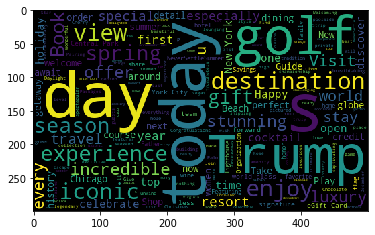

In [35]:
#WordCloud Visualization
allwords = ''.join([i for i in df['Tweets']])
Cloud=WordCloud(random_state=0,max_font_size=100,width=500,height=300).generate(allwords)
plt.imshow(Cloud)
plt.show()

In [37]:
# Create a fucntion to compute negative neutral postive comments
def getAnalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,There’s nothing quite like summer in Chicago. ...,0.657143,0.552381,Positive
1,"The iconic boasts championship golf, stunning...",0.750000,0.500000,Positive
2,Soak up summertime at Oahu's only Forbes Trave...,0.625000,0.166667,Positive
3,Today we celebrate the many incredible fathers...,0.800000,0.800000,Positive
4,‘Tis the season for lounging poolside.,0.000000,0.000000,Neutral
...,...,...,...,...
95,Get in the holiday spirit while skating across...,0.520909,0.347273,Positive
96,: Our first snowfall of the season! ❄️,0.333333,0.312500,Positive
97,Our Christmas tree at is bringing a new level...,0.454545,0.136364,Positive
98,": Every Christmas, our office collects holiday...",0.391667,0.358333,Positive


In [41]:
df[df['Analysis']=='negative']

,Tweets,Subjectivity,Polarity,Analysis
14,: Today we celebrate women in the game of golf...,0.4,-0.4000,negative
27,Savor the sweetness of chocolates all summer ...,0.4,-0.0625,negative
48,": Not content with just donning green hats, ev...",0.3,-0.2250,negative


In [42]:
df['Analysis'].value_counts()

Positive    84
Neutral     13
negative     3
Name: Analysis, dtype: int64

<Figure size 576x432 with 0 Axes>

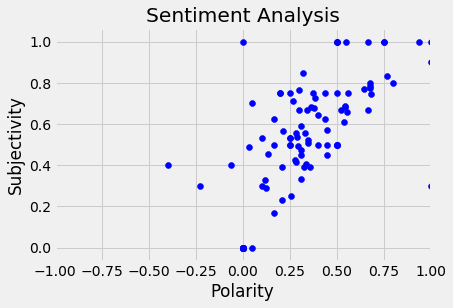

<Figure size 576x432 with 0 Axes>

In [53]:
## plotting scatter plot
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.figure(figsize=(8,6))

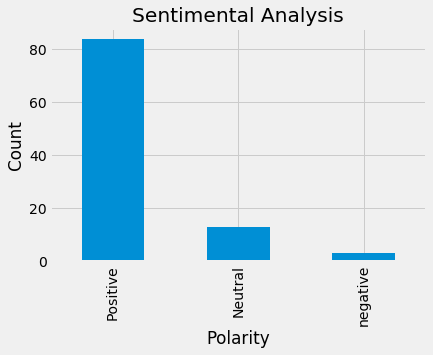

In [59]:
df['Analysis'].value_counts().plot(kind='bar')

plt.title("Sentimental Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

### Only Positive tweets

In [65]:
i=1
postdf=df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,postdf.shape[0]):
    if(postdf['Analysis'][j]=='Positive'):
        print(str(i)+')'+postdf['Tweets'][j])
        print()
        i=i+1

1)There’s nothing quite like summer in Chicago. Experience the city’s most special season with  NeverSettleOffer, featuring 2 tickets for Wendella's architectural boat cruise, a dining credit, and a summer-themed welcome amenity.  

2)The iconic  boasts championship golf, stunning coastline views, and the cutest pups around. NationalTakeYourDogToWorkDay 

3)Soak up summertime at Oahu's only Forbes Travel Guide Five-Star hotel, . Our  NeverSettleSummer offer features private surf lessons, a resort credit, a keepsake Trump Waikiki beach bag, and more. Book today:  

4)Today we celebrate the many incredible fathers throughout our Trump Organization family. Happy Father’s Day to you! 

5)Find Dad’s favorite gift on ’s Father's Day Gift Guide. Last chance for expedited shipping—order today at  

6)Celebrate the Stars and Stripes with  Flag Day sale! Today only, enjoy 30% savings on stays at any of our U.S. destinations through December 31st. Use code FLAGDAY to book:  

7)Pairing NationalRo

### Only Negative Comments

In [67]:
i=1
postdf=df.sort_values(by=['Polarity'])
for j in range(0,postdf.shape[0]):
    if(postdf['Analysis'][j]=='negative'):
        print(str(i)+')'+postdf['Tweets'][j])
        print()
        i=i+1

1): Today we celebrate women in the game of golf and recognize the skills, relationships, and experiences that are created throu…

2)Savor the sweetness of  chocolates all summer long. Shipping of our decadent treats will pause May 1st and resume September 30th. Stock up today! 

3): Not content with just donning green hats, everything from buildings to rivers goes green for St Patrick's Day! 
St. Patri…



### Neutral Comments

In [69]:
i=1
postdf=df.sort_values(by=['Polarity'])
for j in range(0,postdf.shape[0]):
    if(postdf['Analysis'][j]=='Neutral'):
        print(str(i)+')'+postdf['Tweets'][j])
        print()
        i=i+1

1)‘Tis the season for lounging poolside. 

2)Escape to enchanting  for an unmatched travel experience. 

Our  NeverSettleSummer offer features a dining credit and your choice of a Cliffs of Moher picnic or Horseback Riding excursion. Book today:
 

3)Everything you need to unwind. 

4): Take your travels to the next level this summer with our curated NeverSettleSummer packages. Varying by destination and i…

5)We're toasting to WorldCocktailDay with a round-up of expertly crafted cocktails from our  and  destinations around the globe.🍹 

6)Discover the ultimate golf resort experience at , where luxury is woven into every detail. 

📷:  

7)We’re spending NationalBeerDay with a decadent burger followed by a lavish afternoon on the white sand beaches of . 

8): Spring Toward Travel with ! Featuring a spring themed amenity and a generous credit towards dining, their off…

9)If we could be anywhere in the world this StPatricksDay, we'd be at , where Irish history and tradition is woven into